In [1]:
import platform, glob, numpy as np
import pretty_midi
from pypianoroll import Multitrack
from scipy.io import wavfile as spw
from IPython.display import Audio
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
base_dir = "../datasets/theorytab/pianoroll"

### MIDIデータの探索

In [3]:
def files(directory):
    file_list = glob.glob(f"{directory}/*")
    file_list.sort()
    return file_list

In [4]:
initials = files(base_dir)
a_songs = files(initials[0])
song = files(a_songs[0])
midis = glob.glob(f"{song[0]}/*.mid")
[print(mid) for mid in midis]

../datasets/theorytab/pianoroll/a/a-day-to-remember/downfall-of-us-all/pre-chorus-and-chorus_nokey.mid
../datasets/theorytab/pianoroll/a/a-day-to-remember/downfall-of-us-all/pre-chorus-and-chorus_key.mid
../datasets/theorytab/pianoroll/a/a-day-to-remember/downfall-of-us-all/intro-and-verse_key.mid
../datasets/theorytab/pianoroll/a/a-day-to-remember/downfall-of-us-all/intro-and-verse_nokey.mid


[None, None, None, None]

### MIDIデータの読み込みと可視化

[Track(pianoroll=array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), program=0, is_drum=False, name=), Track(pianoroll=array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), program=0, is_drum=False, name=)]


(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7572ad198>,
       dtype=object))

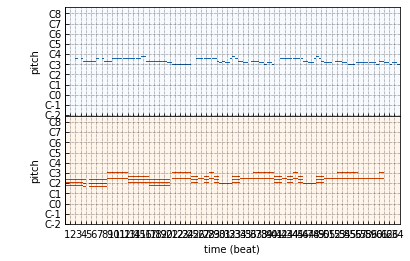

In [5]:
midi_path = midis[1]
midi_data = Multitrack(midi_path)
print(midi_data.tracks)
midi_data.plot()

### MIDIデータをWAVEファイルとして書き出し

In [7]:
def soundfont():
    soundfont = ""
    
    pf = platform.system()
    
    # ubuntu
    if pf == 'Linux':
        soundfont = "../gsfont/gsfont.sf2"

    # mac
    if pf == 'Darwin':
        soundfont = "./data/GeneralUser_GS_v1.471.sf2"
    
    return soundfont

In [8]:
def pm_to_wave(pm, wave_file_name, sf_path, fs=44100):
    
    audio = pm.fluidsynth(fs, sf_path)
    
    # 16bit=2byte符号付き整数に変換してノーマライズ [-32768  ~ 32767]
    audio = np.array(audio * 32767.0, dtype="int16") # floatだと情報量が多くなる
    audio_stereo = np.c_[audio, audio] # ステレオ化
    spw.write(wave_file_name, fs, audio_stereo) # 書き出し
    
    return audio

メロディパートが目立つように楽器を変更  
[楽器一覧](https://www.midi.org/specifications/item/gm-level-1-sound-set)
(プログラム番号は楽器番号-1)

In [22]:
program = 90
midi_data.tracks[0].program = program
pretty_midi.program_to_instrument_name(program)

'Pad 3 (polysynth)'

In [ ]:
wave_file_name = f"./data/{midi_path.split('/')[6]}.wav"
audio = pm_to_wave(midi_data.to_pretty_midi(), wave_file_name, soundfont())
print(len(audio))
plt.plot(audio)
Audio(wave_file_name)